# Import libraries
### for dataframes, plots, and models

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

%config Completer.use_jedi = False
%matplotlib inline

# Load Ames, IA housing data
### from csv to pandas dataframe

In [ ]:
train_path = 'datasets/train.csv'
test_path = 'datasets/test.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
train_df.head(10)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
5,138,535126040,20,RL,137.0,16492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,6,2010,WD,190000
6,2827,908186070,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,6,2006,New,140000
7,145,535154050,20,RL,NaN,12160,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,5,2010,COD,142000
8,1942,535353130,20,RL,NaN,15783,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,Shed,400,6,2007,WD,112500
9,1956,535426130,60,RL,70.0,11606,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,9,2007,WD,135000


In [ ]:
train_df.shape

(2051, 81)

In [ ]:
# to keep backup unedited data frame
old_train_df = train_df

In [ ]:
old_train_df.head(5)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


# Data Cleaning

In [ ]:
# check for null values

missing_percent = train_df.isnull().mean()

In [ ]:
mask = missing_percent > .15

In [ ]:
missing_percent[mask]

Lot Frontage    0.160897
Alley           0.931741
Fireplace Qu    0.487567
Pool QC         0.995612
Fence           0.804973
Misc Feature    0.968308
dtype: float64

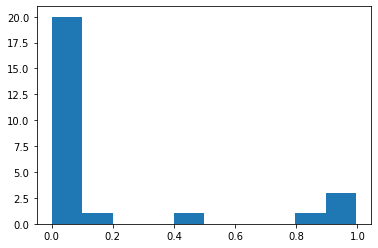

In [ ]:
plt.hist(missing_percent[missing_percent > 0]);

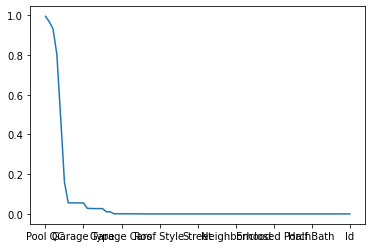

In [ ]:
missing_percent.sort_values(ascending = False).plot();

In [ ]:
# tiddy column names to avoid future errors

def clean_columns(col):
    return col.lower().replace(' ', '_').replace('/', '_')

#from https://github.com/traintestbritt/predicting_house_prices/blob/master/notebook-house_price_predictions-brittany_allen.ipynb

In [ ]:
train_df.columns = [clean_columns(col) for col in train_df.columns]
train_df.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [ ]:
# check for unique values and features

train_df['lot_frontage'].unique()

array([ nan,  43.,  68.,  73.,  82., 137.,  35.,  70.,  21.,  64., 120.,
        24.,  74.,  93.,  34.,  80.,  71.,  72., 109.,  40., 103., 100.,
        92.,  65.,  75.,  60.,  30.,  79.,  41., 105., 107.,  81.,  36.,
        63.,  32.,  94.,  44.,  50.,  48.,  67.,  88.,  83.,  53.,  58.,
        57.,  52.,  87., 134.,  56.,  54., 140.,  78.,  85.,  90.,  96.,
        62.,  49.,  59., 155.,  91.,  61.,  86., 128.,  77.,  42.,  89.,
        51.,  69.,  55., 112.,  76., 125.,  98., 113., 102.,  22., 122.,
        84., 119., 118.,  66.,  95., 108., 195., 106.,  39., 110., 130.,
        97.,  45.,  37., 123.,  38., 129., 115.,  47., 114., 104.,  46.,
       121., 124., 313., 141., 101.,  99., 160., 174.,  26., 144., 138.,
       111.,  25.,  33., 200., 150., 117., 153., 116., 135.])

In [ ]:
sorted(train_df['lot_frontage'].unique(), reverse = True)[:5]

[nan, 313.0, 200.0, 195.0, 174.0]

In [ ]:
train_df['misc_feature'].describe()

count       65
unique       5
top       Shed
freq        56
Name: misc_feature, dtype: object

In [ ]:
train_df['misc_feature'].unique()

array([nan, 'Shed', 'TenC', 'Gar2', 'Othr', 'Elev'], dtype=object)

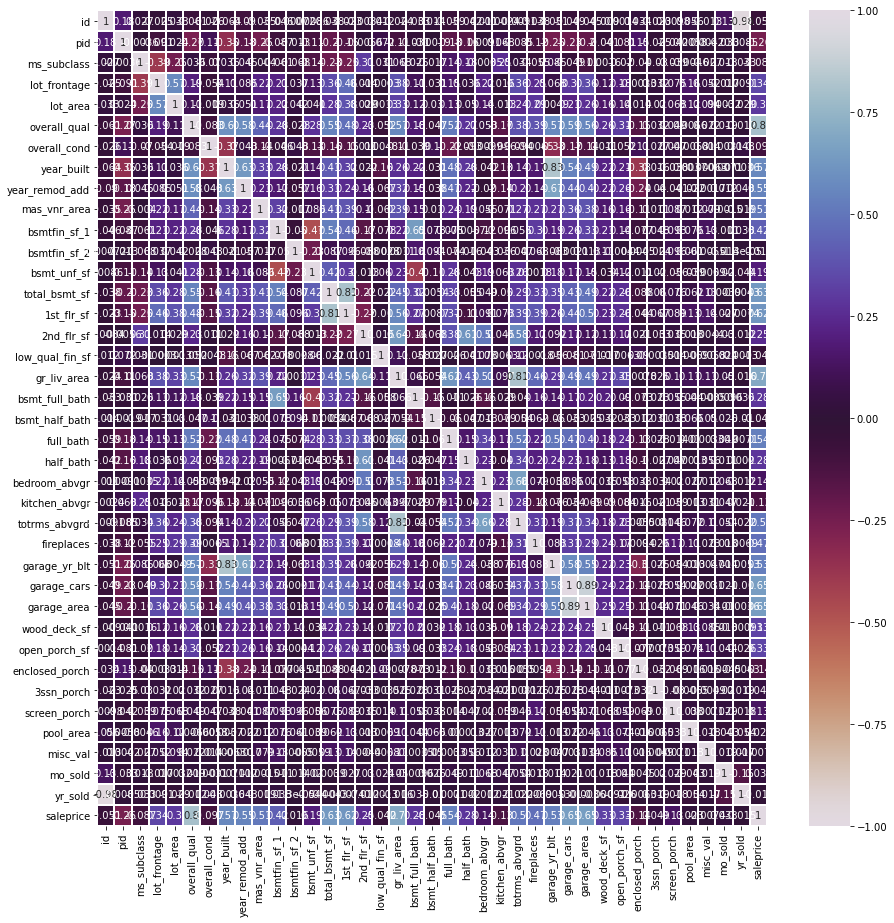

In [ ]:
# check for high positive and negative correlations, also redundancies
plt.figure(figsize=(15, 15))
sns.heatmap(train_df.corr(), cmap='twilight_r', annot=True, vmin=-1, vmax=1, linewidths=1, );

# correlations of interest
## total basement square feet and first floor square feet: 0.79
## garage cars and garage area: 0.9

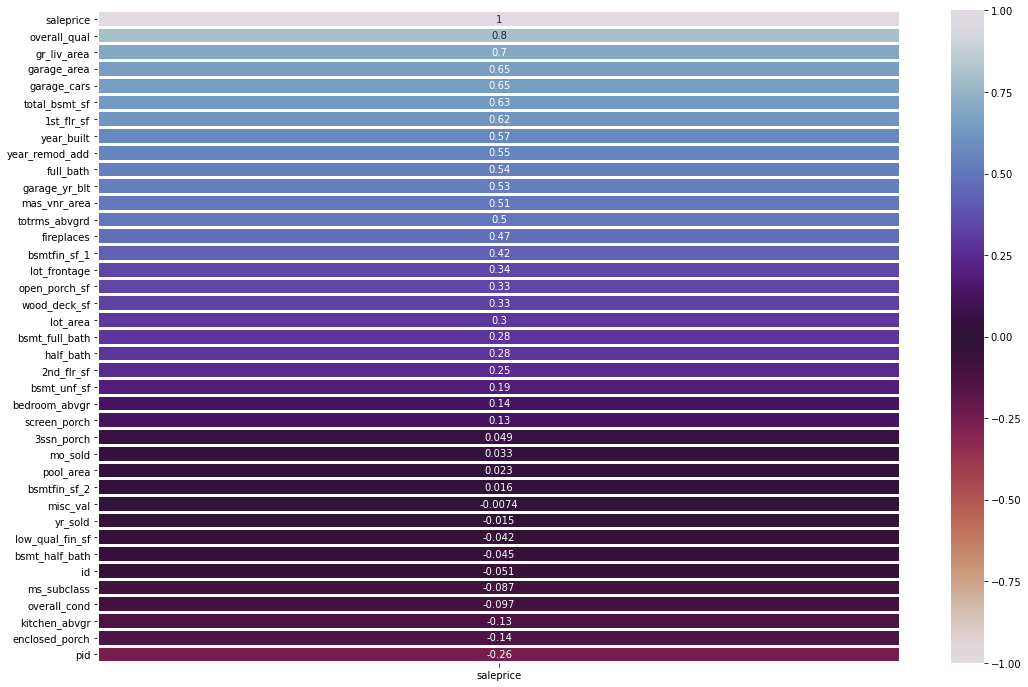

In [ ]:
plt.figure(figsize = (18, 12))
sns.heatmap(train_df.corr()[['saleprice']].sort_values(by= 'saleprice', ascending = False),
           annot = True,
           vmin = -1,
           vmax = 1,
           linewidth = 2,
           cmap = "twilight_r"
           );

# >= 0.62: Overall Qual, Gr Liv Area, Garage Area, Garage Cars, Total Bsmt SF, 1st Flr SF
# >= -0.1: Overall Cond, Kitchen AbvGr, Enclosed Porch, PID

# Correlation results
### garage area correlation is equal to garage cars, garage area gives more description to space though, drop garage cars from features set
### total basement square feet is slightly higher than first floor, drop first floor from features set

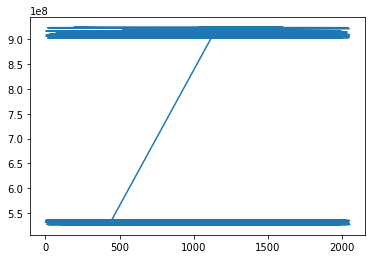

In [ ]:
# ?!?!?!
train_df['pid'].sort_values(ascending = False).plot();

In [ ]:
train_df['overall_qual'].describe()

count    2051.000000
mean        6.112140
std         1.426271
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: overall_qual, dtype: float64

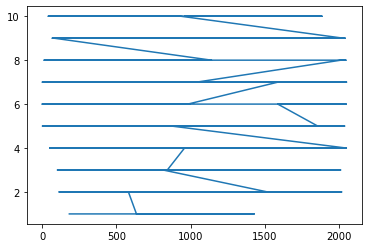

In [ ]:
train_df['overall_qual'].sort_values(ascending = False).plot();

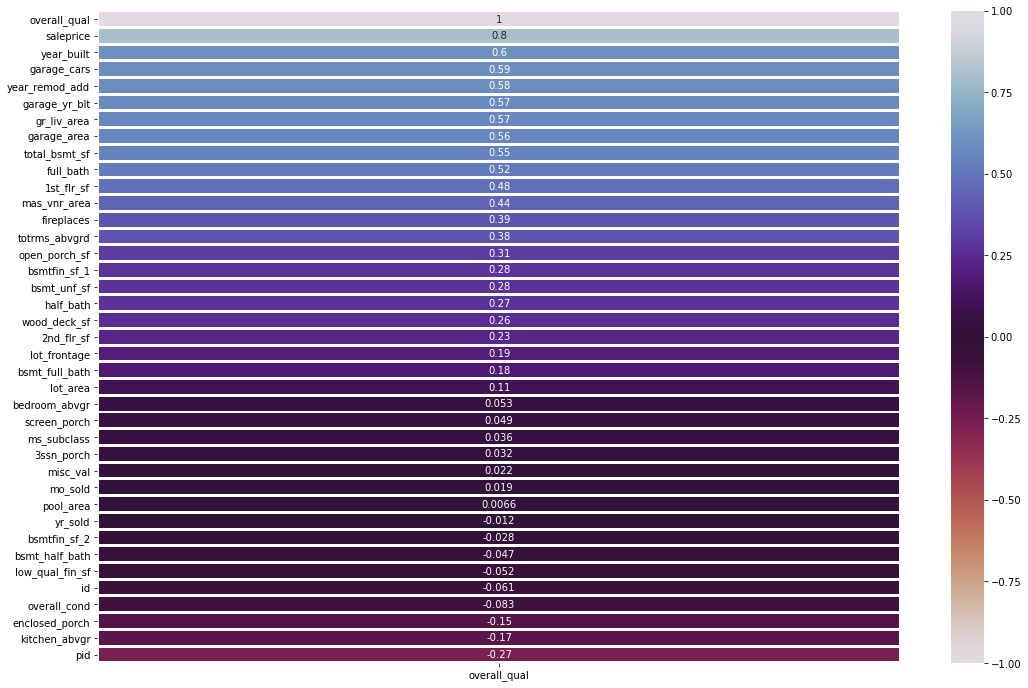

In [ ]:
plt.figure(figsize = (18, 12))
sns.heatmap(train_df.corr()[['overall_qual']].sort_values(by= 'overall_qual', ascending = False),
           annot = True,
           vmin = -1,
           vmax = 1,
           linewidth = 2,
           cmap = "twilight_r"
           );
# >= 0.57: Year Built, Garage Cars, Year Remod/Add, Garage Yr BR, Gr Liv Area
# >= 0.50: Garage Area, Total Bsmt SF, Full Bath

# <= -0.15: Enclosed Porch, Kitchen AbvGr, PID

In [ ]:
# All dtype == number
# 'Overall Qual', 'Gr Liv Area', 'Garage Area', 'Garage Cars', 'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Year Remod/Add', 'Garage Yr BR'

In [ ]:
train_df.select_dtypes(np.number).columns

Index(['id', 'pid', 'ms_subclass', 'lot_frontage', 'lot_area', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod_add', 'mas_vnr_area',
       'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area',
       'bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath',
       'bedroom_abvgr', 'kitchen_abvgr', 'totrms_abvgrd', 'fireplaces',
       'garage_yr_blt', 'garage_cars', 'garage_area', 'wood_deck_sf',
       'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch',
       'pool_area', 'misc_val', 'mo_sold', 'yr_sold', 'saleprice'],
      dtype='object')

<Figure size 1440x1440 with 0 Axes>

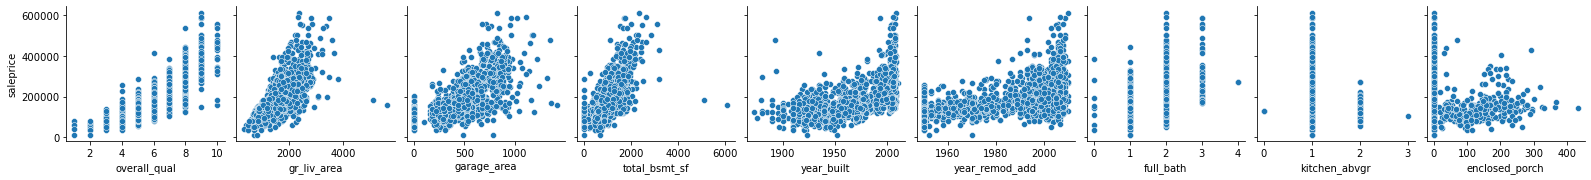

In [ ]:
plt.figure(figsize = (20, 20))
sns.pairplot(data = train_df, y_vars = ['saleprice'], x_vars = ['overall_qual', 'gr_liv_area', 'garage_area', 'total_bsmt_sf', 'year_built', 'year_remod_add', 'full_bath', 'kitchen_abvgr', 'enclosed_porch'], diag_kind = None);

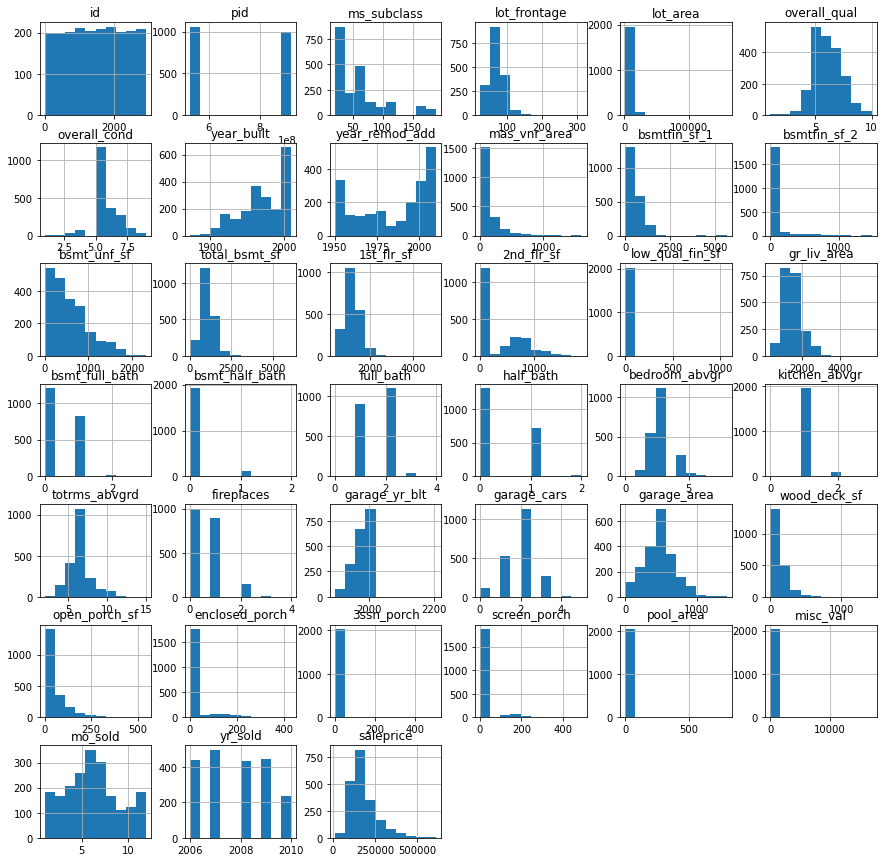

In [ ]:
train_df.hist(figsize = (15, 15));

In [ ]:
train_df.shape

(2051, 81)

In [ ]:
train_df.drop(['pid', 'pool_qc', 'alley', 'fence', 'misc_feature', 'fireplace_qu'], axis = 1, inplace = True)
train_df.shape

(2051, 75)

In [ ]:
missing_percent[mask]

Lot Frontage    0.160897
Alley           0.931741
Fireplace Qu    0.487567
Pool QC         0.995612
Fence           0.804973
Misc Feature    0.968308
dtype: float64

In [ ]:
train_df['lot_frontage'].dropna(inplace = True)

In [ ]:
train_df['lot_frontage'].isnull().sum()

330

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: saleprice, dtype: float64


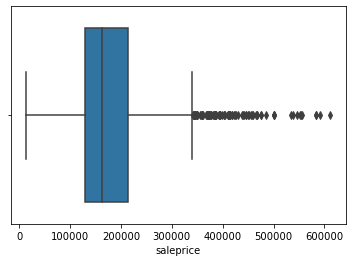

In [ ]:
sns.boxplot(x = 'saleprice', data = train_df)
print(train_df['saleprice'].describe())

count    2051.000000
mean        6.112140
std         1.426271
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: overall_qual, dtype: float64


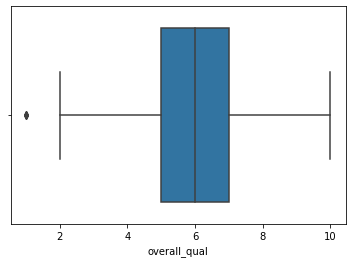

In [ ]:
sns.boxplot(x = 'overall_qual', data = train_df)
print(train_df['overall_qual'].describe())

count    2051.000000
mean     1499.330083
std       500.447829
min       334.000000
25%      1129.000000
50%      1444.000000
75%      1728.500000
max      5642.000000
Name: gr_liv_area, dtype: float64


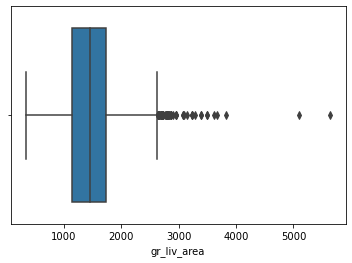

In [ ]:
# check outliers
sns.boxplot(x = 'gr_liv_area', data = train_df)
print(train_df['gr_liv_area'].describe())

In [ ]:
#identify two significant outliers
train_df.sort_values(by = 'gr_liv_area', ascending = False)[:2]

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,...,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
960,1499,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,...,292,0,0,0,480,0,1,2008,New,160000
1885,2181,20,RL,128.0,39290,Pave,IR1,Bnk,AllPub,Inside,...,484,0,0,0,0,17000,10,2007,New,183850


<AxesSubplot:xlabel='gr_liv_area'>

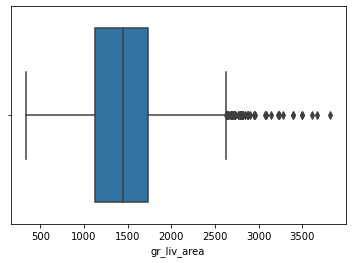

In [ ]:
#remove outliers, check for removal
train_df = train_df.drop(train_df[train_df['id'] == 1499].index)
train_df =train_df.drop(train_df[train_df['id'] == 2181].index)
sns.boxplot(x = 'gr_liv_area', data = train_df)

#https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

count    2048.000000
mean      472.878418
std       214.501543
min         0.000000
25%       319.000000
50%       480.000000
75%       576.000000
max      1356.000000
Name: garage_area, dtype: float64


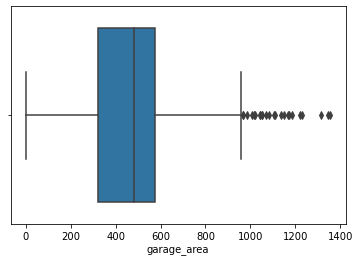

In [ ]:
sns.boxplot(x = 'garage_area', data = train_df)
print(train_df['garage_area'].describe())

In [ ]:
train_df.select_dtypes(np.number).columns

Index(['id', 'ms_subclass', 'lot_frontage', 'lot_area', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod_add', 'mas_vnr_area',
       'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area',
       'bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath',
       'bedroom_abvgr', 'kitchen_abvgr', 'totrms_abvgrd', 'fireplaces',
       'garage_yr_blt', 'garage_cars', 'garage_area', 'wood_deck_sf',
       'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch',
       'pool_area', 'misc_val', 'mo_sold', 'yr_sold', 'saleprice'],
      dtype='object')

In [ ]:
train_df.loc[:, 'garage_area'] = train_df.loc[:, 'garage_area'].fillna(0)

In [ ]:
train_df.loc[:, 'garage_cars'] = train_df.loc[:, 'garage_cars'].fillna(0)

In [ ]:
train_df.dtypes[['overall_qual', 'gr_liv_area', 'garage_area', 'total_bsmt_sf', 'year_built', 'year_remod_add', 'full_bath', 'mas_vnr_area', 'fireplaces', 'kitchen_abvgr', 'enclosed_porch', 'overall_cond', 'ms_subclass']]

overall_qual        int64
gr_liv_area         int64
garage_area       float64
total_bsmt_sf     float64
year_built          int64
year_remod_add      int64
full_bath           int64
mas_vnr_area      float64
fireplaces          int64
kitchen_abvgr       int64
enclosed_porch      int64
overall_cond        int64
ms_subclass         int64
dtype: object

In [ ]:
train_df['garage_area'] = train_df['garage_area'].astype(int)

In [ ]:
train_df['mas_vnr_area'].isnull().sum()

22

In [ ]:
train_df['mas_vnr_area'].describe()

count    2027.000000
mean       98.797731
std       172.563846
min         0.000000
25%         0.000000
50%         0.000000
75%       160.000000
max      1600.000000
Name: mas_vnr_area, dtype: float64

In [ ]:
train_df.loc[:, 'mas_vnr_area'] = train_df.loc[:, 'mas_vnr_area'].fillna(0)

In [ ]:
train_df['mas_vnr_area'] = train_df['mas_vnr_area'].astype(int)

In [ ]:
train_df['total_bsmt_sf'].isnull().sum()

1

In [ ]:
train_df.loc[:, 'total_bsmt_sf'] = train_df.loc[:, 'total_bsmt_sf'].fillna(0)

In [ ]:
train_df['total_bsmt_sf'] = train_df['total_bsmt_sf'].astype(int)

In [ ]:
train_df.dtypes[['overall_qual', 'gr_liv_area', 'garage_area', 'total_bsmt_sf', 'year_built', 'year_remod_add', 'full_bath', 'mas_vnr_area', 'fireplaces', 'kitchen_abvgr', 'enclosed_porch', 'overall_cond', 'ms_subclass']]

overall_qual      int64
gr_liv_area       int64
garage_area       int64
total_bsmt_sf     int64
year_built        int64
year_remod_add    int64
full_bath         int64
mas_vnr_area      int64
fireplaces        int64
kitchen_abvgr     int64
enclosed_porch    int64
overall_cond      int64
ms_subclass       int64
dtype: object

# Modeling

In [ ]:
features = ['overall_qual', 'gr_liv_area', 'garage_area', 'total_bsmt_sf', 'year_built', 'year_remod_add', 'full_bath', 'mas_vnr_area', 'fireplaces', 'kitchen_abvgr', 'enclosed_porch', 'overall_cond', 'ms_subclass']
X = train_df[features].copy()
y = train_df['saleprice'].copy()
X.head()

,overall_qual,gr_liv_area,garage_area,total_bsmt_sf,year_built,year_remod_add,full_bath,mas_vnr_area,fireplaces,kitchen_abvgr,enclosed_porch,overall_cond,ms_subclass
0,6,1479,475,725,1976,2005,2,289,0,1,0,8,60
1,7,2122,559,913,1996,1997,2,132,1,1,0,5,60
2,5,1057,246,1057,1953,2007,1,0,0,1,0,7,20
3,5,1444,400,384,2006,2007,2,0,0,1,0,5,60
4,6,1445,484,676,1900,1993,2,0,0,1,0,8,50


In [ ]:
X.shape

(2049, 13)

In [ ]:
y.shape

(2049,)

In [ ]:
X.shape[0] == y.shape[0]

True

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
X_train.head()

,overall_qual,gr_liv_area,garage_area,total_bsmt_sf,year_built,year_remod_add,full_bath,mas_vnr_area,fireplaces,kitchen_abvgr,enclosed_porch,overall_cond,ms_subclass
1152,6,1488,552,1488,1968,1968,2,0,2,1,216,6,20
1643,3,492,200,492,1921,1950,1,0,0,1,78,5,30
1359,5,2138,360,849,1898,1965,2,0,0,3,0,5,75
1638,5,1001,216,837,1930,2007,1,0,0,1,42,9,30
1091,6,1644,418,1416,1953,1953,1,238,2,1,0,5,20


In [ ]:
print(f"Shape of original data frame: {train_df.shape}")
print(" ")
print(f"Shape of X train: {X_train.shape}")
print(f"Shape of y train: {y_train.shape}")
print(" ")
print(f"Shape of X test: {X_test.shape}")
print(f"Shape of y test: {y_test.shape}")

Shape of original data frame: (2049, 75)
 
Shape of X train: (1372, 13)
Shape of y train: (1372,)
 
Shape of X test: (677, 13)
Shape of y test: (677,)


In [ ]:
1435 + 616

2051

In [ ]:
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

In [ ]:
lr = LinearRegression()

In [ ]:
lr_scores = cross_val_score(lr, X_train_scaled, y_train, cv =7)
lr_scores

array([0.86167471, 0.84880571, 0.79439013, 0.8252946 , 0.87884625,
       0.81560982, 0.81382903])

In [ ]:
lr_scores.mean()

0.8340643200419756

In [ ]:
lr_scores.std()

0.02773870062348225

## Model fitting and eval.

In [ ]:
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
lr.score(X_train_scaled, y_train)

0.8393579277728361

In [ ]:
lr.score(X_test_scaled, y_test)

0.8635435561496576

### check the residuals(errors)

In [ ]:
train_preds = lr.predict(X_train_scaled)
test_preds = lr.predict(X_test_scaled)

In [ ]:
train_mse = mean_squared_error(y_train, train_preds)
train_mse

991825494.3026714

In [ ]:
test_mse = mean_squared_error(y_test, test_preds)
test_mse

884261491.9602567

In [ ]:
train_rmse = mean_squared_error(y_train, train_preds, squared=False)
train_rmse

31493.261093489054

In [ ]:
test_rmse = mean_squared_error(y_test, test_preds, squared=False)
test_rmse

29736.534632674615

In [ ]:
# Evaluate against the baseline.
baseline_prediction = np.full(y_test.shape, fill_value=y_train.mean())
mean_squared_error(y_test, baseline_prediction, squared=False)

80766.43498029986

In [ ]:
coefs = list(zip(features, lr.coef_))
coef_df = pd.DataFrame(coefs, columns=['Feature', 'Coefficient'])
coef_df

,Feature,Coefficient
0,overall_qual,20993.549988
1,gr_liv_area,29048.232363
2,garage_area,7270.772483
3,total_bsmt_sf,14622.926703
4,year_built,11222.268385
5,year_remod_add,5975.647325
6,full_bath,-3461.333688
7,mas_vnr_area,6912.864310
8,fireplaces,5430.850717
9,kitchen_abvgr,-2279.147007


In [ ]:
coef_df.sort_values(by='Coefficient', ascending=False)

,Feature,Coefficient
1,gr_liv_area,29048.232363
0,overall_qual,20993.549988
3,total_bsmt_sf,14622.926703
4,year_built,11222.268385
2,garage_area,7270.772483
7,mas_vnr_area,6912.864310
5,year_remod_add,5975.647325
8,fireplaces,5430.850717
11,overall_cond,3952.977391
10,enclosed_porch,-369.922434


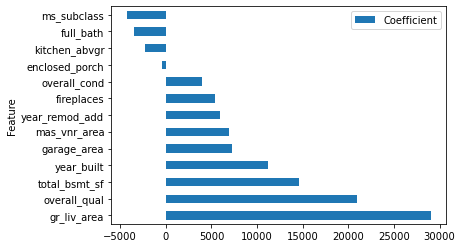

In [ ]:
coef_df.set_index("Feature").sort_values(by='Coefficient', ascending=False).plot(kind='barh');

In [ ]:
coef_df['coef_abs'] = coef_df['Coefficient'].abs()
coef_df

,Feature,Coefficient,coef_abs
0,overall_qual,20993.549988,20993.549988
1,gr_liv_area,29048.232363,29048.232363
2,garage_area,7270.772483,7270.772483
3,total_bsmt_sf,14622.926703,14622.926703
4,year_built,11222.268385,11222.268385
5,year_remod_add,5975.647325,5975.647325
6,full_bath,-3461.333688,3461.333688
7,mas_vnr_area,6912.864310,6912.864310
8,fireplaces,5430.850717,5430.850717
9,kitchen_abvgr,-2279.147007,2279.147007


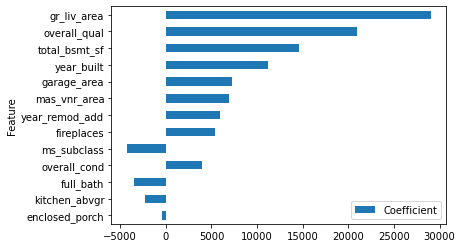

In [ ]:
coef_df.set_index("Feature").sort_values(by='coef_abs', ascending=True)[['Coefficient']].plot(kind='barh');

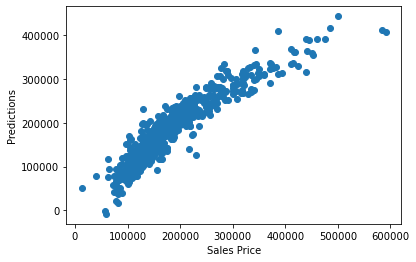

In [ ]:
plt.scatter(y_test, test_preds)
plt.xlabel("Sales Price")
plt.ylabel("Predictions");

# kaggle submission

In [ ]:
test_df.columns = [clean_columns(col) for col in test_df.columns]
test_df.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [ ]:
test_df.drop(['pid', 'pool_qc', 'alley', 'fence', 'misc_feature', 'fireplace_qu'], axis = 1, inplace = True)
test_df.shape

(878, 74)

In [ ]:
test_df.dtypes[['overall_qual', 'gr_liv_area', 'garage_area', 'total_bsmt_sf', 'year_built', 'year_remod_add', 'full_bath', 'mas_vnr_area', 'fireplaces', 'kitchen_abvgr', 'enclosed_porch', 'overall_cond', 'ms_subclass']]

overall_qual        int64
gr_liv_area         int64
garage_area         int64
total_bsmt_sf       int64
year_built          int64
year_remod_add      int64
full_bath           int64
mas_vnr_area      float64
fireplaces          int64
kitchen_abvgr       int64
enclosed_porch      int64
overall_cond        int64
ms_subclass         int64
dtype: object

In [ ]:
test_df.loc[:, 'garage_area'] = test_df.loc[:, 'garage_area'].fillna(0)
test_df.loc[:, 'mas_vnr_area'] = test_df.loc[:, 'mas_vnr_area'].fillna(0)
test_df.loc[:, 'total_bsmt_sf'] = test_df.loc[:, 'total_bsmt_sf'].fillna(0)

test_df['garage_area'] = test_df['garage_area'].astype(int)
test_df['mas_vnr_area'] = test_df['mas_vnr_area'].astype(int)
test_df['total_bsmt_sf'] = test_df['total_bsmt_sf'].astype(int)

In [ ]:
test_df.dtypes[['overall_qual', 'gr_liv_area', 'garage_area', 'total_bsmt_sf', 'year_built', 'year_remod_add', 'full_bath', 'mas_vnr_area', 'fireplaces', 'kitchen_abvgr', 'enclosed_porch', 'overall_cond', 'ms_subclass']]

overall_qual      int64
gr_liv_area       int64
garage_area       int64
total_bsmt_sf     int64
year_built        int64
year_remod_add    int64
full_bath         int64
mas_vnr_area      int64
fireplaces        int64
kitchen_abvgr     int64
enclosed_porch    int64
overall_cond      int64
ms_subclass       int64
dtype: object

In [ ]:
#Submission to Kaggle
X_submission = test_df[features]
ss.fit(X_submission)
X_submission_scaled = ss.transform(X_submission)

pred_submission = lr.predict(X_submission_scaled)

print(pred_submission.shape)

(878,)


In [ ]:
print(test_df.shape)

(878, 75)


In [ ]:
test_df.head(10)

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,...,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,2658,190,RM,69.0,9142,Pave,Reg,Lvl,AllPub,Inside,...,60,112,0,0,0,0,4,2006,WD,1.066721e+08
1,2718,90,RL,NaN,9662,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,0,8,2006,WD,1.240194e+08
2,2414,60,RL,58.0,17104,Pave,IR1,Lvl,AllPub,Inside,...,24,0,0,0,0,0,9,2006,New,9.069971e+07
3,1989,30,RM,60.0,8520,Pave,Reg,Lvl,AllPub,Inside,...,0,184,0,0,0,0,7,2007,WD,7.943618e+07
4,625,20,RL,NaN,9500,Pave,IR1,Lvl,AllPub,Inside,...,76,0,0,185,0,0,7,2009,WD,1.003258e+08
5,333,160,RM,21.0,1890,Pave,Reg,Lvl,AllPub,Inside,...,0,64,0,0,0,0,6,2010,WD,7.526686e+07
6,1327,20,RM,52.0,8516,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,5,2008,WD,8.085190e+07
7,858,20,RL,NaN,9286,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,0,0,0,10,2009,WD,9.149931e+07
8,95,160,FV,39.0,3515,Pave,Reg,Lvl,AllPub,Inside,...,111,0,0,0,0,0,1,2010,WD,9.947171e+07
9,1568,20,RL,75.0,10125,Pave,Reg,Lvl,AllPub,Inside,...,83,0,0,0,0,0,2,2008,WD,9.232556e+07


In [ ]:
# Put submission into Kaggle's test data

test_df['saleprice'] = pred_submission
test_df.head(10)

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,...,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,2658,190,RM,69.0,9142,Pave,Reg,Lvl,AllPub,Inside,...,60,112,0,0,0,0,4,2006,WD,142477.526296
1,2718,90,RL,NaN,9662,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,0,8,2006,WD,197074.537937
2,2414,60,RL,58.0,17104,Pave,IR1,Lvl,AllPub,Inside,...,24,0,0,0,0,0,9,2006,New,193054.030945
3,1989,30,RM,60.0,8520,Pave,Reg,Lvl,AllPub,Inside,...,0,184,0,0,0,0,7,2007,WD,118079.732695
4,625,20,RL,NaN,9500,Pave,IR1,Lvl,AllPub,Inside,...,76,0,0,185,0,0,7,2009,WD,200122.425335
5,333,160,RM,21.0,1890,Pave,Reg,Lvl,AllPub,Inside,...,0,64,0,0,0,0,6,2010,WD,83784.998982
6,1327,20,RM,52.0,8516,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,5,2008,WD,115404.536246
7,858,20,RL,NaN,9286,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,0,0,0,10,2009,WD,158547.510533
8,95,160,FV,39.0,3515,Pave,Reg,Lvl,AllPub,Inside,...,111,0,0,0,0,0,1,2010,WD,196091.115424
9,1568,20,RL,75.0,10125,Pave,Reg,Lvl,AllPub,Inside,...,83,0,0,0,0,0,2,2008,WD,182555.635478


In [ ]:
# Submit submission to Kaggle's test data
submission = test_df[['id', 'saleprice']].sort_values(by = 'id')
submission.head()


,id,saleprice
703,2,122285.392065
705,4,270148.474374
119,6,193988.039895
311,7,210463.745871
400,17,214953.555912


In [ ]:
submission.shape

(878, 2)

In [ ]:
# Write to csv!!!
submission.to_csv("tmp_saleprice_model.csv", index = False)